In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sportsdataverse as sdv

In [2]:
pbp = sdv.nfl.load_nfl_pbp(seasons=2021)

In [3]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,None,None,None,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0.0,1.0,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0.0,1.0,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0.0,1.0,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652


In [4]:
cin_pbp = pbp[pbp['posteam'] == 'CIN']

In [5]:
cin_2nd = cin_pbp[(cin_pbp['down'] == 2) & (cin_pbp['yardline_100'] > 20) & (cin_pbp['yardline_100'] < 80)]

In [6]:
cin_2ndshort = cin_2nd[(cin_2nd['ydstogo'] < 4) & cin_2nd['play_type'].isin(['pass', 'run'])]

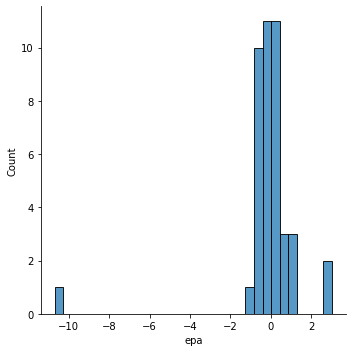

In [7]:
sns.displot(x = 'epa', data = cin_2ndshort)

In [8]:
worst_play = cin_2ndshort[cin_2ndshort['epa'] == min(cin_2ndshort['epa'])]

In [9]:
print(worst_play['epa'])

33322   -10.688841
Name: epa, dtype: float64


In [10]:
pd.options.display.max_colwidth = 1000
print(worst_play['desc'])

33322    (13:53) 28-J.Mixon right guard to LAC 37 for -3 yards (95-C.Covington). FUMBLES (95-C.Covington), RECOVERED by LAC-20-T.Campbell at LAC 39. 20-T.Campbell for 61 yards, TOUCHDOWN.
Name: desc, dtype: object


In [11]:
no_worst_play = cin_2ndshort[cin_2ndshort['play_id'] != max(worst_play['play_id'])]

In [12]:
no_worst_play['play_type'].value_counts()

run     31
pass    10
Name: play_type, dtype: int64

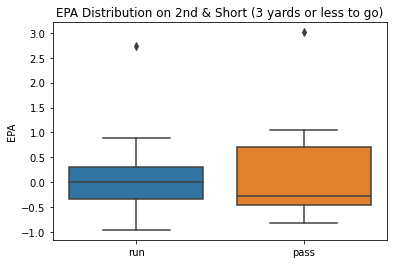

In [13]:
sns.boxplot(x = 'play_type', y = 'epa', data = no_worst_play).set(title = 'EPA Distribution on 2nd & Short (3 yards or less to go)', xlabel = '', ylabel = 'EPA')
plt.savefig('epa_distribution.png', dpi = 200)